In [48]:
import numpy as np

import pandas as pd

In [49]:
bike_df = pd.read_csv('train.csv')

#bike_df

In [50]:
feature_cols = ['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']

In [51]:
X = bike_df[feature_cols]

y = bike_df['count']



In [52]:
from datetime import datetime, time, date

In [53]:


bike_df['hour'] = bike_df.datetime.apply(lambda x : x.split()[1].split(':')[0])

bike_df['day_of_year'] = bike_df.datetime.apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:00:00').strftime('%j'))

bike_df['weekday']= bike_df.datetime.apply(lambda x : datetime.strptime(x,  '%Y-%m-%d %H:00:00').strftime('%w'))

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
season = LabelEncoder()
weather = LabelEncoder()


bike_df['season'] = season.fit_transform(bike_df.season)
bike_df['weather'] = weather.fit_transform(bike_df.weather)

In [57]:
from sklearn.preprocessing import OneHotEncoder

In [58]:
season_ohe = OneHotEncoder()
weather_ohe = OneHotEncoder()

Xs = season_ohe.fit_transform(bike_df.season.values.reshape(-1,1)).toarray()
Xw = weather_ohe.fit_transform(bike_df.weather.values.reshape(-1,1)).toarray()

In [59]:
bike_dfOneHot = pd.DataFrame(Xs, columns = ["season"+str(int(i)) for i in range(Xs.shape[1])])
bike_df = pd.concat([bike_df, bike_dfOneHot], axis=1)

bike_dfOneHot = pd.DataFrame(Xw, columns = ["weather"+str(int(i)) for i in range(Xw.shape[1])])
bike_df = pd.concat([bike_df, bike_dfOneHot], axis=1)

In [60]:
bike_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'hour', 'day_of_year', 'weekday', 'season0', 'season1', 'season2',
       'season3', 'weather0', 'weather1', 'weather2', 'weather3'],
      dtype='object')

In [61]:
#Ignore categorical columns. Recognize one hot encoded columns
#Remove casual & registered columns
#Drop datetime column

In [62]:
feature_cols_ohe = ['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'hour', 'day_of_year', 'weekday', 'season0', 'season1', 'season2', 'season3', 'weather0', 'weather1', 'weather2', 'weather3']

fl = len(feature_cols_ohe)

X_ohe = bike_df[feature_cols_ohe]

X_ohe = pd.DataFrame(X_ohe)

feature_cols_ohe

['holiday',
 'workingday',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'hour',
 'day_of_year',
 'weekday',
 'season0',
 'season1',
 'season2',
 'season3',
 'weather0',
 'weather1',
 'weather2',
 'weather3']

In [63]:
#hour bins
#X_ohe[0::1000]

In [64]:
def hour_bins(hour): 
    hour = int(hour)
    if 0 <= hour <= 5: 
        return 1
    elif 6 <= hour <= 11:
        return 2
    elif 12 <= hour <= 17:
        return 3
    else: 
        return 4
X_ohe['hour'] = X_ohe['hour'].apply(lambda x : hour_bins(x))
#X_ohe[0::1000]
X_ohe.hour.unique()


array([1, 2, 3, 4], dtype=int64)

In [65]:
#one hot encode hour now
hr = LabelEncoder()

X_ohe['hour'] = hr.fit_transform(X_ohe.hour)

hr_ohe = OneHotEncoder()

Xh = hr_ohe.fit_transform(X_ohe.hour.values.reshape(-1,1)).toarray()


X_OneHot = pd.DataFrame(Xh, columns = ["hour"+str(int(i)) for i in range(Xh.shape[1])])
X_ohe = pd.concat([X_ohe, X_OneHot], axis=1)

In [66]:
#ignore hour and recognize new columns
X_ohe.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'hour', 'day_of_year', 'weekday', 'season0', 'season1', 'season2',
       'season3', 'weather0', 'weather1', 'weather2', 'weather3', 'hour0',
       'hour1', 'hour2', 'hour3'],
      dtype='object')

In [67]:
feat_minus_hr = ['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'day_of_year', 'weekday', 'season0', 'season1', 'season2',
       'season3', 'weather0', 'weather1', 'weather2', 'weather3', 'hour0',
       'hour1', 'hour2', 'hour3']

fl = len(feat_minus_hr)

X_ohe = X_ohe[feat_minus_hr]

X_ohe = pd.DataFrame(X_ohe)

print(fl)

20


In [69]:
#Normalize features

In [72]:
from sklearn import preprocessing

features_numpyarray = preprocessing.scale(X_ohe)

X_ohe = pd.DataFrame(features_numpyarray, columns = X_ohe.columns)

#X_ohe.head()
X_ohe.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'day_of_year', 'weekday', 'season0', 'season1', 'season2', 'season3',
       'weather0', 'weather1', 'weather2', 'weather3', 'hour0', 'hour1',
       'hour2', 'hour3'],
      dtype='object')

In [24]:
#X_ohe['humidity'] = X_ohe['humidity'].apply(lambda y : y/max(X_ohe.humidity)*100)
#X_ohe.humidity
#X_ohe.temp
#X_ohe['temp'] = X_ohe['temp'].apply(lambda y : y/max(X_ohe.temp)*100)
#X_ohe.atemp
#X_ohe['atemp'] = X_ohe['atemp'].apply(lambda y : y/max(X_ohe.atemp)*100)
#X_ohe.windspeed
#X_ohe['windspeed'] = X_ohe['windspeed'].apply(lambda y : y/max(X_ohe.windspeed)*100)
#X_ohe.casual
#X_ohe['casual'] = X_ohe['casual'].apply(lambda y : y/max(X_ohe.casual)*100)
#X_ohe.registered
#X_ohe['registered'] = X_ohe['registered'].apply(lambda y : y/max(X_ohe.registered)*100)

In [25]:
#PCA to reduce number of features or other feature selection search in sklearn!!
#do predictive models by month or each season will have 12 predictive models



bike_df['count'].mean()


191.57413191254824

In [26]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [27]:
#KNN REGRESSOR ALGORITHM ATTRIBUTE FEATURE IMPORTANCE
#Check accuracy using rmse

X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size = 0.25, random_state = 4)

In [28]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)


RMSE value for k=  1 is: 145.97666970097484
RMSE value for k=  2 is: 134.52245489390728
RMSE value for k=  3 is: 130.84265727714316
RMSE value for k=  4 is: 127.8847480003936
RMSE value for k=  5 is: 125.91463875481406
RMSE value for k=  6 is: 124.89607689138602
RMSE value for k=  7 is: 124.44936312318399
RMSE value for k=  8 is: 124.42746162251693
RMSE value for k=  9 is: 125.00139954405597
RMSE value for k=  10 is: 124.78515265858535
RMSE value for k=  11 is: 124.82075346667804
RMSE value for k=  12 is: 124.76951787770936
RMSE value for k=  13 is: 124.77319490472547
RMSE value for k=  14 is: 124.6653250141458
RMSE value for k=  15 is: 124.47591480278047
RMSE value for k=  16 is: 124.46472966018632
RMSE value for k=  17 is: 124.64690980443352
RMSE value for k=  18 is: 125.00447936477521
RMSE value for k=  19 is: 125.3044104638769
RMSE value for k=  20 is: 125.41434025408196


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

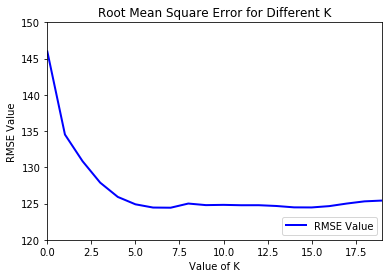

In [30]:
plt.figure()

ax = plt.figure().add_subplot(111)

plt.plot(rmse_val, color = 'blue', lw=2, label = 'RMSE Value')

plt.xlim([0, 19])
plt.ylim([120, 150])

#x = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
my_xticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
#plt.xticks(x, my_xticks)



plt.xlabel('Value of K')
plt.ylabel('RMSE Value')
plt.title('Root Mean Square Error for Different K')
plt.legend(loc="lower right")

plt.show

Best value for k is 8 therefore we will use k = 8 for the prediction.

In [31]:
k = 8

knn = neighbors.KNeighborsRegressor(n_neighbors = k)

knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=8, p=2,
          weights='uniform')

In [32]:
y_predict = knn.predict(X_test)

In [33]:
from sklearn import metrics
import numpy as np

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_predict)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print(rmse)

124.42746162251693


In [34]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [35]:
#Kaggle recommended measuring accuracy using rmsle

rmsle = rmsle(y_test, y_predict)

print(rmsle)

0.7831881136426423


Now trying XGBoost Algorithm

In [33]:
from xgboost import XGBRegressor

In [34]:
clf = XGBRegressor()

In [35]:
clf.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [36]:
clf_y_predict = clf.predict(X_test)

In [37]:
from sklearn import metrics
import numpy as np

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, clf_y_predict)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print(rmse)

124.31791745421913


Now we will do Cross Validation

In [38]:
from sklearn.model_selection import cross_val_score

Cross Validation for KNN Regressor

In [39]:
cv_k = cross_val_score(knn, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error')

cv_k_pos = - cv_k

rmse_cv_k = np.sqrt(cv_k_pos)

print(rmse_cv_k)

cv_k_mean = rmse_cv_k.mean()


print("\n")
print(cv_k_mean)

[123.06619241 124.43370162 122.14668303 130.2617444  120.74811021
 124.55824745 123.43204971 123.17022185 121.63141704 123.91990033]


123.73682680498514


Cross Validation for XG Boost

In [40]:
cv_xgb = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error')

cv_xgb_pos = - cv_xgb

rmse_cv_xgb = np.sqrt(cv_xgb_pos)

print(rmse_cv_xgb)

cv_xgb_mean = rmse_cv_xgb.mean()


print("\n")
print(cv_xgb_mean)

[123.13463059 121.63879001 118.5257519  128.22671995 119.39625766
 120.96277781 122.91820266 120.80041207 123.83284492 121.15473277]


122.05911203438066


Will now perform PCA

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.25, random_state=3)

scaler = StandardScaler().fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)

X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)


In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA()

pca.fit(X_train)

cpts = pd.DataFrame(pca.transform(X_train)) #new data frame

x_axis = np.arange(1, pca.n_components_+1) #new columns

pca_scaled = PCA()

pca_scaled.fit(X_train_scaled)

cpts_scaled = pd.DataFrame(pca.transform(X_train_scaled))

In [45]:
knn_ada = neighbors.KNeighborsRegressor(n_neighbors = 8)

knn_ada.fit(X_train_scaled, y_train)

y_predict = knn.predict(X_test)



Will now perform ADA Boost Algorithm

In [46]:
from sklearn.ensemble import AdaBoostRegressor

In [47]:
knn_ada = neighbors.KNeighborsRegressor(n_neighbors = 8)

knn_ada.fit(X_train_scaled, y_train)

ada_boost = AdaBoostRegressor(knn_ada)
mse_ada = cross_val_score(ada_boost, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print(mse_ada)

mse_ada_positive = - mse_ada
print(mse_ada_positive)
 
rmse_ada = np.sqrt(mse_ada_positive)
print(rmse_ada)

accuracy_cv_ada = rmse_ada.mean()
print(accuracy_cv_ada)

[-20210.4468138  -19744.45520961 -16357.5747399  -21221.67732558
 -21984.0630553  -21154.93018536 -19591.93820849 -17442.68914675
 -19954.50335095 -19843.25643382]
[20210.4468138  19744.45520961 16357.5747399  21221.67732558
 21984.0630553  21154.93018536 19591.93820849 17442.68914675
 19954.50335095 19843.25643382]
[142.16345105 140.51496436 127.89673467 145.67661901 148.27023658
 145.44734506 139.97120493 132.07077325 141.26040971 140.86609398]
140.41378325969782
